# Programming for Data Analysis - Project 1

**Ciaran Moran**

***

**Standard imports**

In [4]:
import matplotlib.pyplot as plt 
import random
import datetime
import pandas as pd 
import seaborn as sns
import numpy as np

***Define some global variables***

In [5]:
#mthMin=[]
#mthMax=[]
#mth=""

**Data File dly532.csv**

This is a real world time series data csv file available for download from met.ie.

It represents the historical weather in Ireland from 1942 through to Sep 2023.

The various data fields are explained in the first 25 lines of the dly532.csv file.

I have manually removed the the first 25 non data lines from the start of the file dly532.csv 
and copied the data to file ***dly532-non-data-removed.csv***.

The removed lines can be seen in the original file dly532.csv.


The main columns of data I will be looking at are:-
- date:   -  00 to 00 utc
- rain:   -  Precipitation Amount (mm)
- maxtp:  -  Maximum Air Temperature (C)	  
- mintp:  -  Minimum  Air Temperature (C)
- hg:     -  Highest Gust (knot)
- sun:    -  Sunshine duration (hours)

From this real world data the min and max values can be extrapolated.
Random data can then be synthesised based these real world min/max values.

***Initial csv data load***

A sample of the data will be displayed.

This will be the header, first 5 rows of data and also the last 5 rows of data. 

Finally a count of rows and columns will be diplayed.

For this dataset there are 29858 rows × 26 columns.


In [6]:
# Read in csv file and select columns for obtaining max/min data 
# full data set
#
# parse_dates function taken from website
# https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/09_timeseries.html
# This will enable us to date functions late on for plots.
#
df = pd.read_csv('Data/dly532/dly532-non-data-removed.csv', usecols = ['date','maxtp','mintp','rain','sun'])
#rain data set
df_rain = pd.read_csv('Data/dly532/dly532-non-data-removed.csv', usecols = ['date','rain'])
#max temp data set
df_maxtp = pd.read_csv('Data/dly532/dly532-non-data-removed.csv', usecols = ['date','maxtp']) 
#min temp data set
df_mintp = pd.read_csv('Data/dly532/dly532-non-data-removed.csv', usecols = ['date','mintp']) 
#daily hours of sun dataset
df_sun = pd.read_csv('Data/dly532/dly532-non-data-removed.csv', usecols = ['date','sun']) 
#new data table with months, variable, and min and max values
df_new=pd.DataFrame(columns=['month','tempmax','tempmin','rainmax','rainmin','sunmax','sunmin'])


print("print (pd.options.display.max_columns).................................", print (pd.options.display.max_columns))
print("df.shape[0] .....................................................", df.shape[0] )
print("df....................................................>>")
display(df) 
df.describe 

print("df_maxtp....................................................>>")
display(df_maxtp) 
df_maxtp.describe 



20
print (pd.options.display.max_columns)................................. None
df.shape[0] ..................................................... 29858
df....................................................>>


,date,maxtp,mintp,rain,sun
0,01-jan-1942,9.7,6.8,0.0,0.0
1,02-jan-1942,9.9,7.9,0.1,0.0
2,03-jan-1942,11.2,8.9,1.5,0.1
3,04-jan-1942,9.2,2.7,3.5,0.6
4,05-jan-1942,3.5,-0.8,0.6,3.4
...,...,...,...,...,...
29853,26-sep-2023,17.5,10.0,3.2,4.1
29854,27-sep-2023,16.5,10.0,15.0,0.4
29855,28-sep-2023,15.5,10.5,1.4,0.0
29856,29-sep-2023,16.4,10.1,0.3,8.9


df_maxtp....................................................>>


,date,maxtp
0,01-jan-1942,9.7
1,02-jan-1942,9.9
2,03-jan-1942,11.2
3,04-jan-1942,9.2
4,05-jan-1942,3.5
...,...,...
29853,26-sep-2023,17.5
29854,27-sep-2023,16.5
29855,28-sep-2023,15.5
29856,29-sep-2023,16.4


<bound method NDFrame.describe of               date  maxtp
0      01-jan-1942    9.7
1      02-jan-1942    9.9
2      03-jan-1942   11.2
3      04-jan-1942    9.2
4      05-jan-1942    3.5
...            ...    ...
29853  26-sep-2023   17.5
29854  27-sep-2023   16.5
29855  28-sep-2023   15.5
29856  29-sep-2023   16.4
29857  30-sep-2023   17.5

[29858 rows x 2 columns]>

***Get the Max and Min values of the temp per month***

Re-using modified code based on the following websites 

https://stackoverflow.com/questions/31391275/using-like-inside-pandas-query

https://www.w3schools.com/python/python_functions.asp


***Functions***

Using modified code from websites

https://www.w3schools.com/python/python_functions.asp

https://docs.python.org/3/tutorial/controlflow.html

https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

https://vitalflux.com/pandas-dataframe-how-to-add-rows-columns/

https://stackoverflow.com/questions/6088077/how-to-get-a-random-number-between-a-float-range



In [7]:
def funGetMonthMinMax(x):
  #global mth
  
 # print("********************MATCHING ON X>",x)
  match x:
    case 1:
      mth="jan"
    case 2:
      mth="feb"
    case 3:
      mth="mar"
    case 4:
      mth="apr"
    case 5:
      mth="may"
    case 6:
      mth="jun"
    case 7:
      mth="jul"
    case 8:
      mth="aug"
    case 9:
      mth="sep"
    case 10:
      mth="oct"
    case 11:
      mth="nov"
    case 12:
      mth="dec"
  
  # Create new dataset for just the month
  dftemp=df[df["date"].str.contains(mth, case=False,  regex=False)]
  #dftemp=df[df["date"].str.contains(mth)]
  print("dftemp.shape[0] .....................................................", dftemp.shape[0] )

  print("dftemp .......................................................", mth)
  dftemp.describe
  #print(dftemp)

  # now set the min and max variables
  #tempmax=""
  #tempmin=""
  #rainmax=""
  #rainmin=""
  #sunmax=""
  #sunmin=""
  #print("tempmax:", tempmax)
  #print("tempmin:",tempmin)
  #print("rainmax:",rainmax)
  #print("rainmin:",rainmin)
  #print("sunmax:",sunmax)
  #print("sunmin:",sunmin)
  

  #tempmax=dftemp[['maxtp']].max()
  #tempmin=dftemp[['mintp']].min()
  #rainmax=dftemp[['rain']].max()
  #rainmin=dftemp[['rain']].min()
  #sunmax=dftemp[['sun']].max()
  #sunmin=dftemp[['sun']].min()
  
  tempmax=dftemp['maxtp'].max()
  tempmin=dftemp['mintp'].min()
  rainmax=dftemp['rain'].max()
  rainmin=dftemp['rain'].min()
  sunmax=dftemp['sun'].median()
  #sunmin=dftemp['sun'].min()

  print(mth, "........................................................")
  print("tempmax:", tempmax)
  print("tempmin:",tempmin)
  print("rainmax:",rainmax)
  print("rainmin:",rainmin)
  print("sunmax:",sunmax)
  #print("sunmin:",sunmin)
  print("...........................................................")
  
  # Here we add a new row with the actual data
  # So row 1 for a month can be used to vidually check the min/max random values
  new_row = {'month': mth, 'tempmax': tempmax, 'tempmin': tempmin, 'rainmax': rainmax, \
             'rainmin': rainmin,'sunmax': sunmax
             }
  # Use the loc method to add the new row to the DataFrame
  #print("new_row: ", new_row)
  df_new.loc[len(df_new)] = new_row

  # Next this will add 10 additional rows with random/simulated data
  for x in range(1,11):
    tempmaxRand=round(random.uniform(tempmin, tempmax),1)
    tempminRand=round(random.uniform(tempmin, tempmax),1)
    rainmaxRand=round(random.uniform(rainmin, rainmax),1)
    rainminRand=round(random.uniform(rainmin, rainmax),1)
    sunmaxRand=round(random.uniform(0, sunmax),1)
    #sunminRand=round(random.uniform(sunmin, sunmax),1)
    new_row = {'month': mth, 'tempmax': tempmaxRand, 'tempmin': tempminRand, 'rainmax': rainmaxRand, \
             'rainmin': rainminRand,'sunmax': sunmaxRand}
    # Use the loc method to add the new row to the DataFrame
    #print("new_row: ", new_row)
    df_new.loc[len(df_new)] = new_row
    


Using code referenced from these websites

https://www.w3schools.com/python/python_for_loops.asp

In [8]:
#FINDING MAX AND MIN
#df2=df.query('date.str.contains("jan")')
#print(df2)

#Loop for each month of the year, and find/set the min and max temp
# here range (1,13)actually means 1-12 i.e. the count stops at 13 and 13 isn't included
# This will also generate 10 rows of random data per month, within min/max values
for x in range(1,13):
    funGetMonthMinMax(x)
#print used for checking min/max
#for x in range(0,12):
#    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>",x, "mthMin>", mthMin[x]," mthMax>",mthMax[x])
#print(df_new)
    
print("df_new >>>>>>>>>>")
print("df_new.shape[0] .....................................................", df_new.shape[0] )
print(df_new) 
display(df_new) 
df_new.describe 


dftemp.shape[0] ..................................................... 2542
dftemp ....................................................... jan
jan ........................................................
tempmax: 16.6
tempmin: -9.5
rainmax: 33.1
rainmin: 0.0
sunmax: 0.8
...........................................................
dftemp.shape[0] ..................................................... 2316
dftemp ....................................................... feb
feb ........................................................
tempmax: 16.2
tempmin: -10.9
rainmax: 34.9
rainmin: 0.0
sunmax: 1.8
...........................................................
dftemp.shape[0] ..................................................... 2542
dftemp ....................................................... mar
mar ........................................................
tempmax: 21.3
tempmin: -7.9
rainmax: 35.7
rainmin: 0.0
sunmax: 2.9
...........................................................
dftemp.sh

dftemp.shape[0] ..................................................... 2542
dftemp ....................................................... may
may ........................................................
tempmax: 23.5
tempmin: -3.0
rainmax: 49.6
rainmin: 0.0
sunmax: 6.1
...........................................................
dftemp.shape[0] ..................................................... 2460
dftemp ....................................................... jun
jun ........................................................
tempmax: 26.5
tempmin: 0.7
rainmax: 92.6
rainmin: 0.0
sunmax: 5.5
...........................................................
dftemp.shape[0] ..................................................... 2542
dftemp ....................................................... jul
jul ........................................................
tempmax: 29.1
tempmin: 3.9
rainmax: 42.4
rainmin: 0.0
sunmax: 4.6
...........................................................
dftemp.shape

,month,tempmax,tempmin,rainmax,rainmin,sunmax,sunmin
0,jan,16.6,-9.5,33.1,0.0,0.8,NaN
1,jan,4.8,2.5,12.9,15.2,0.6,NaN
2,jan,-6.1,-2.7,0.8,4.8,0.3,NaN
3,jan,11.3,14.8,22.0,13.9,0.4,NaN
4,jan,-0.1,-5.9,7.9,31.3,0.5,NaN
...,...,...,...,...,...,...,...
127,dec,8.9,6.2,41.7,5.9,0.5,NaN
128,dec,-7.9,-12.1,51.2,25.6,0.7,NaN
129,dec,1.5,-8.5,8.0,8.0,0.5,NaN
130,dec,-7.5,6.2,50.4,25.1,0.6,NaN


<bound method NDFrame.describe of     month  tempmax  tempmin  rainmax  rainmin  sunmax  sunmin
0     jan     16.6     -9.5     33.1      0.0     0.8     NaN
1     jan      4.8      2.5     12.9     15.2     0.6     NaN
2     jan     -6.1     -2.7      0.8      4.8     0.3     NaN
3     jan     11.3     14.8     22.0     13.9     0.4     NaN
4     jan     -0.1     -5.9      7.9     31.3     0.5     NaN
..    ...      ...      ...      ...      ...     ...     ...
127   dec      8.9      6.2     41.7      5.9     0.5     NaN
128   dec     -7.9    -12.1     51.2     25.6     0.7     NaN
129   dec      1.5     -8.5      8.0      8.0     0.5     NaN
130   dec     -7.5      6.2     50.4     25.1     0.6     NaN
131   dec      8.7     12.1      3.8     50.7     0.6     NaN

[132 rows x 7 columns]>

**Now will will produce a number of plots to show the data, and compare contract and make observations**

Links to websites that I have re-used code from

https://www.geeksforgeeks.org/how-to-plot-a-dataframe-using-pandas/



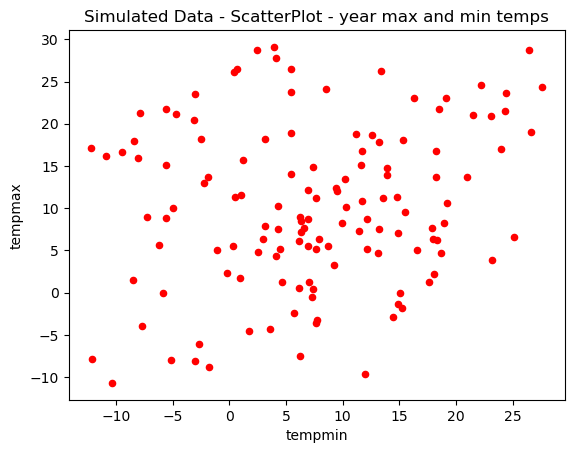

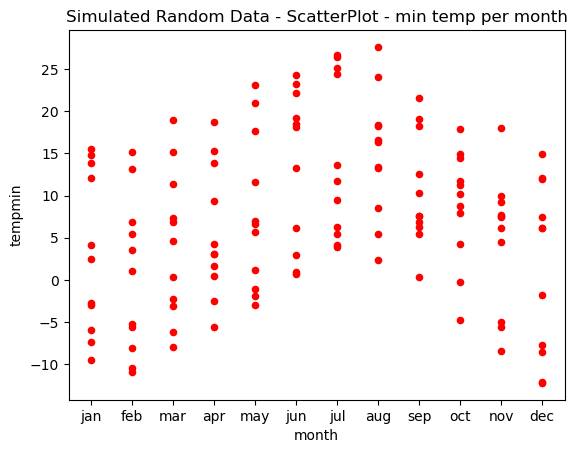

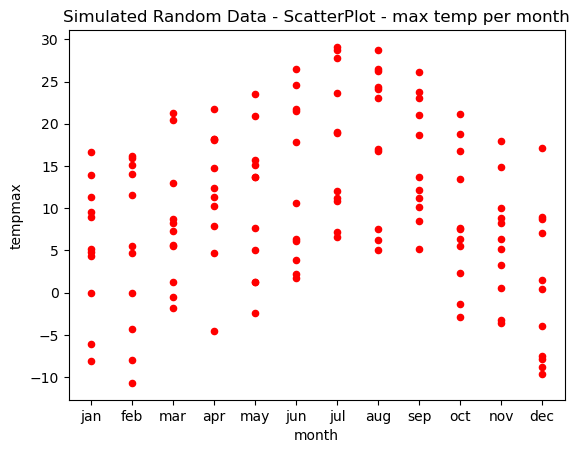

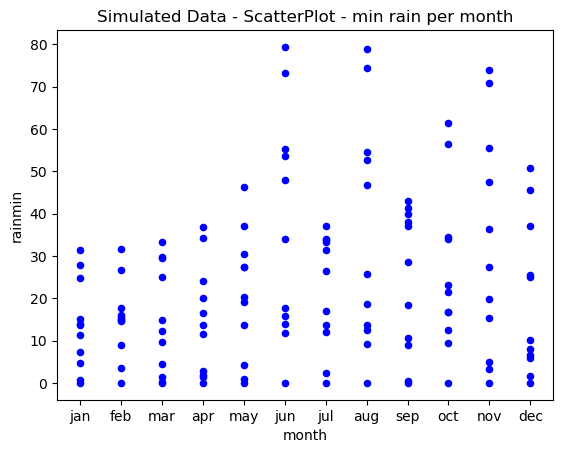

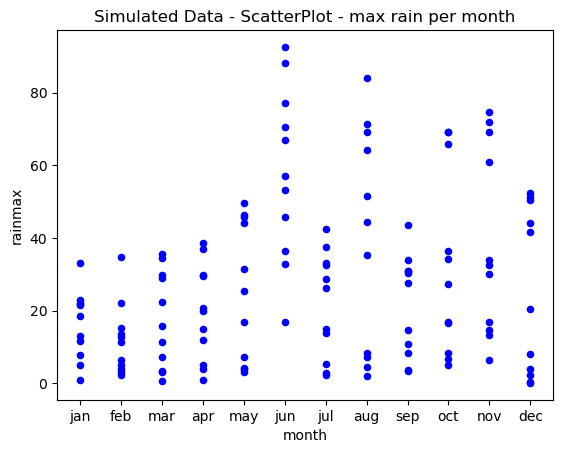

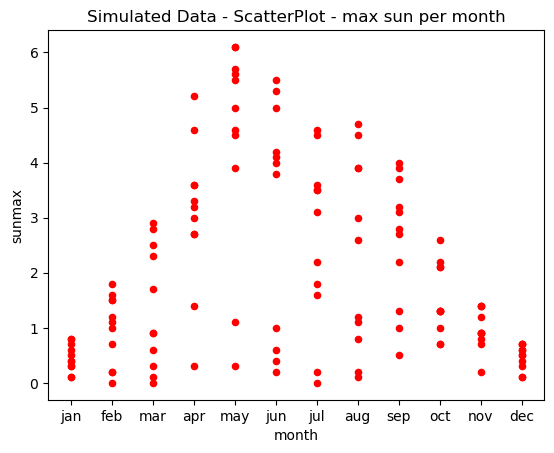

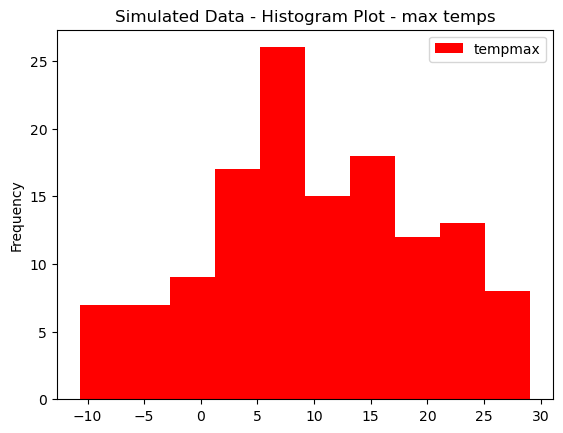

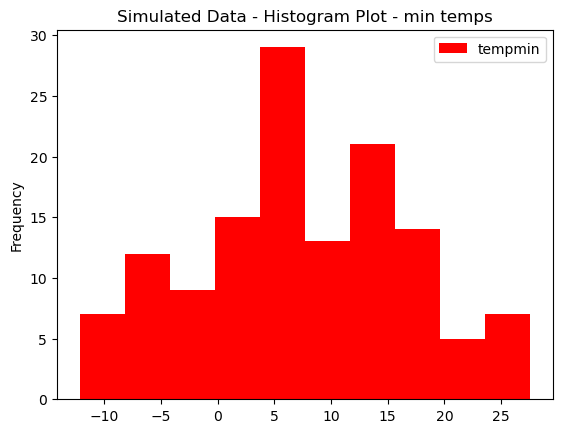

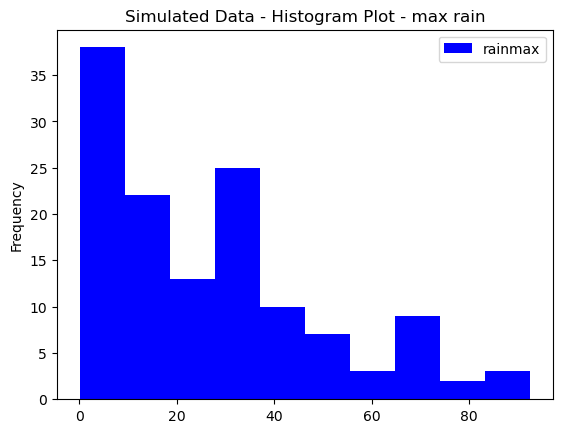

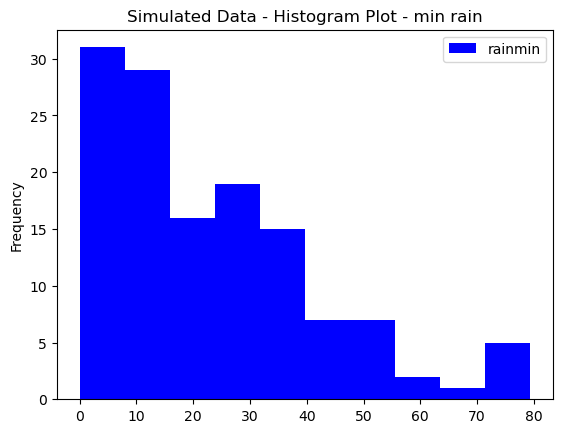

<Figure size 1000x800 with 0 Axes>

In [9]:
# -------------------------------------------------------------
# Simulated Data - scatter plot , max and min temp
# -------------------------------------------------------------
%matplotlib inline 
df_new.plot(kind='scatter', 
        x='tempmin', 
        y='tempmax', 
        color='red') 
  
# set the title 
plt.title('Simulated Data - ScatterPlot - year max and min temps') 
plt.plot(marker = '.', markersize = 10)

  # show the plot 
plt.show() 


# -------------------------------------------------------------
# Simulated Random Data -  scatter plot , min temp per month
# -------------------------------------------------------------
%matplotlib inline 
df_new.plot(kind='scatter', 
        x='month', 
        y='tempmin', 
        color='red') 
  
# set the title 
plt.title('Simulated Random Data - ScatterPlot - min temp per month') 
plt.plot(marker = '.', markersize = 10)

  # show the plot 
plt.show() 



# -------------------------------------------------------------
#  Simulated Random Data -  scatter plot , max temp per month
# -------------------------------------------------------------
%matplotlib inline 
df_new.plot(kind='scatter', 
        x='month', 
        y='tempmax', 
        color='red') 
  
# set the title 
plt.title('Simulated Random Data - ScatterPlot - max temp per month') 
plt.plot(marker = '.', markersize = 10)
  # show the plot 
plt.show() 


# -------------------------------------------------------------
#  Simulated Data -  scatter plot , min rain per month
# -------------------------------------------------------------
%matplotlib inline 
df_new.plot(kind='scatter', 
        x='month', 
        y='rainmin', 
        color='blue') 
  
# set the title 
plt.title('Simulated Data - ScatterPlot - min rain per month') 
plt.plot(marker = '.', markersize = 10)
# show the plot 
plt.show() 


# -------------------------------------------------------------
#  Simulated Data -  scatter plot , max rain per month
# -------------------------------------------------------------
%matplotlib inline 
df_new.plot(kind='scatter', 
        x='month', 
        y='rainmax', 
        color='blue') 
  
# set the title 
plt.title('Simulated Data - ScatterPlot - max rain per month') 
plt.plot(marker = '.', markersize = 10)
# show the plot 
plt.show() 

# -------------------------------------------------------------
#  Simulated Data -  scatter plot , max sun per month
# -------------------------------------------------------------
%matplotlib inline 
df_new.plot(kind='scatter', 
        x='month', 
        y='sunmax', 
        color='red') 
  
# set the title 
plt.title('Simulated Data - ScatterPlot - max sun per month') 
plt.plot(marker = '.', markersize = 10)
  
# show the plot 
plt.show() 

## -------------------------------------------------------------
##  Simulated Data -  scatter plot , min sun per month
## -------------------------------------------------------------
#%matplotlib inline 
#df_new.plot(kind='scatter', 
#        x='month', 
#        y='sunmin', 
#        color='red') 
#  
## set the title 
#plt.title('Simulated Data - ScatterPlot - min sun per month') 
  
## show the plot 
#plt.show() 


#####################################################
#########TEMPMAX PLOT AS HISTOGRAM PLOT##############
#####################################################
df_new.plot(kind='hist', 
        x='month', 
        y='tempmax', 
        color='red') 
  
# set the title 
plt.title('Simulated Data - Histogram Plot - max temps') 
  # show the plot 
plt.show() 

#####################################################
#########TEMPMIN PLOT AS HISTOGRAM PLOT##############
#####################################################
df_new.plot(kind='hist', 
        x='month', 
        y='tempmin', 
        color='red') 
  
# set the title 
plt.title('Simulated Data - Histogram Plot - min temps') 
  # show the plot 
plt.show() 

#####################################################
#########RAINMAX PLOT AS HISTOGRAM PLOT##############
#####################################################
df_new.plot(kind='hist', 
        x='month', 
        y='rainmax', 
        color='blue') 
  
# set the title 
plt.title('Simulated Data - Histogram Plot - max rain') 
  # show the plot 
plt.show() 

#####################################################
#########RAINMIN PLOT AS HISTOGRAM PLOT##############
#####################################################
df_new.plot(kind='hist', 
        x='month', 
        y='rainmin', 
        color='blue') 
  
# set the title 
plt.title('Simulated Data - Histogram Plot - min rain') 
  # show the plot 
plt.figure(figsize=(10,8))
plt.show() 



# Seaborn plots


In [10]:
sns.pairplot(df_new, hue ='month')
# setting the title using Matplotlib 
plt.title('Simulated Data') 
plt.tight_layout()
plt.show () 

 print()




IndentationError: unexpected indent (3721417022.py, line 7)

## Compare generated simulated data with the original data.
### Looking at the comparison, the plots are quite similar in nature.
### Although some variations do naturally exist, the rising and falling actions are comparable accross the months of the year.
### I am there satisfied with the simulated data that is being generated.

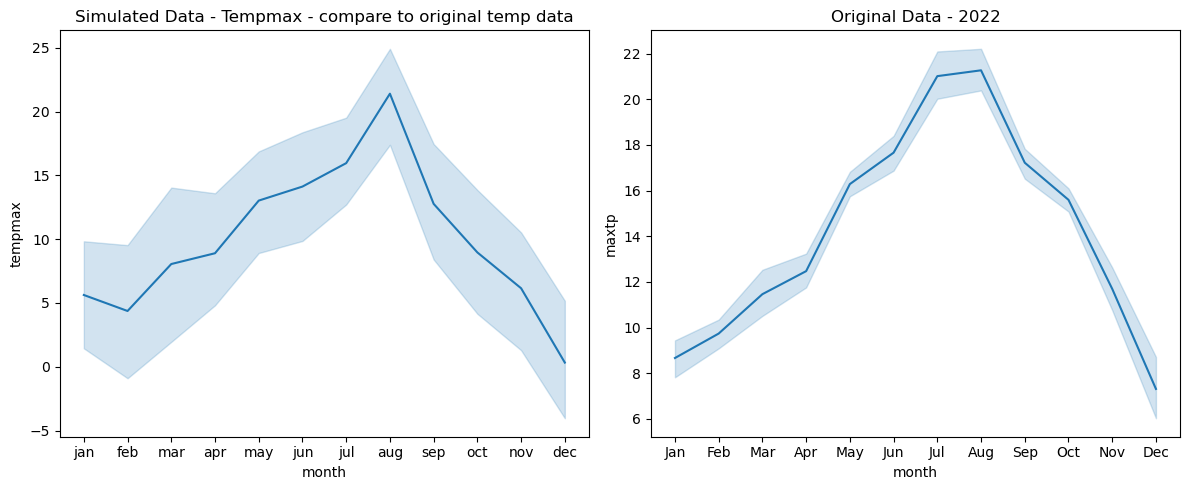

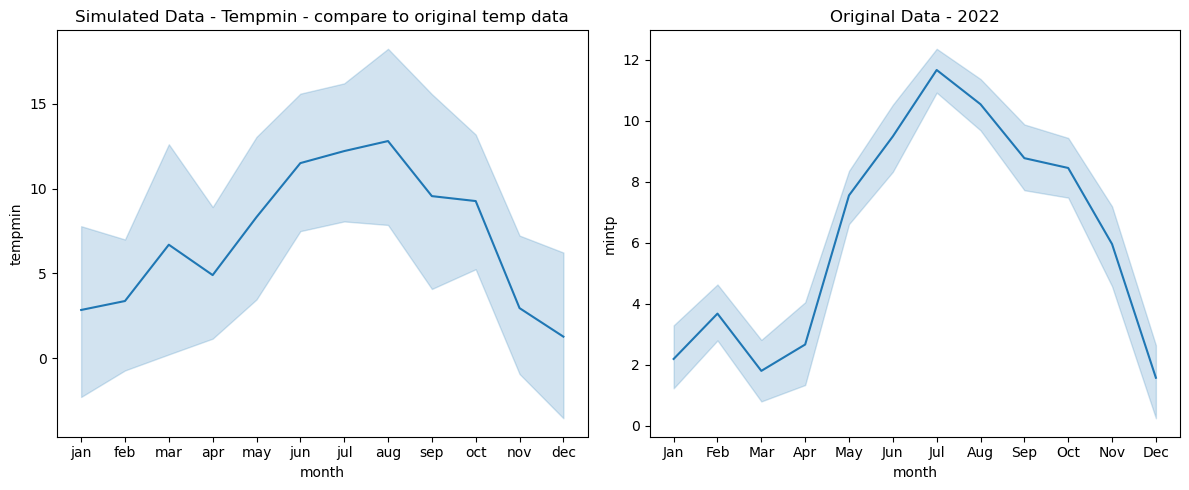

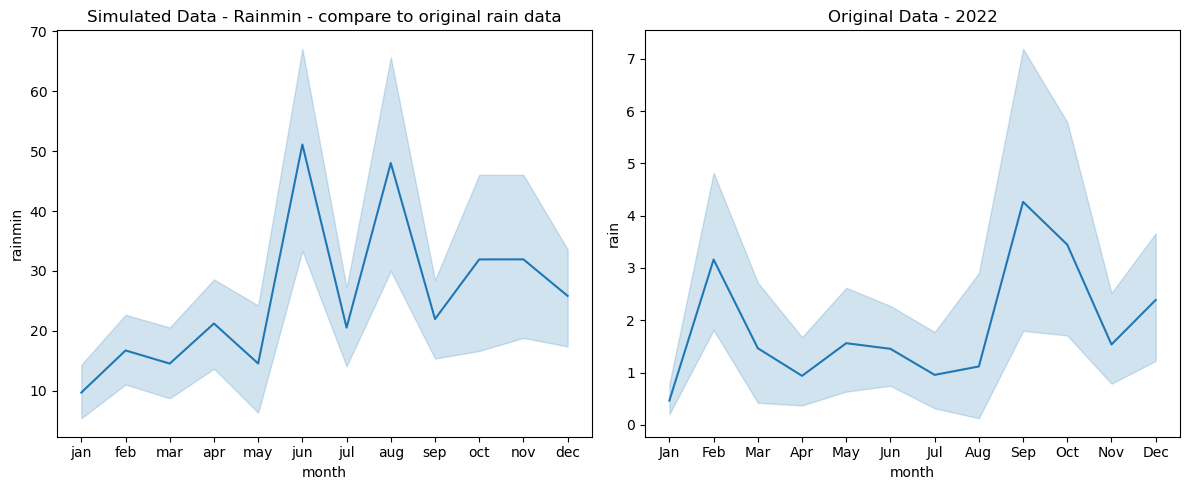

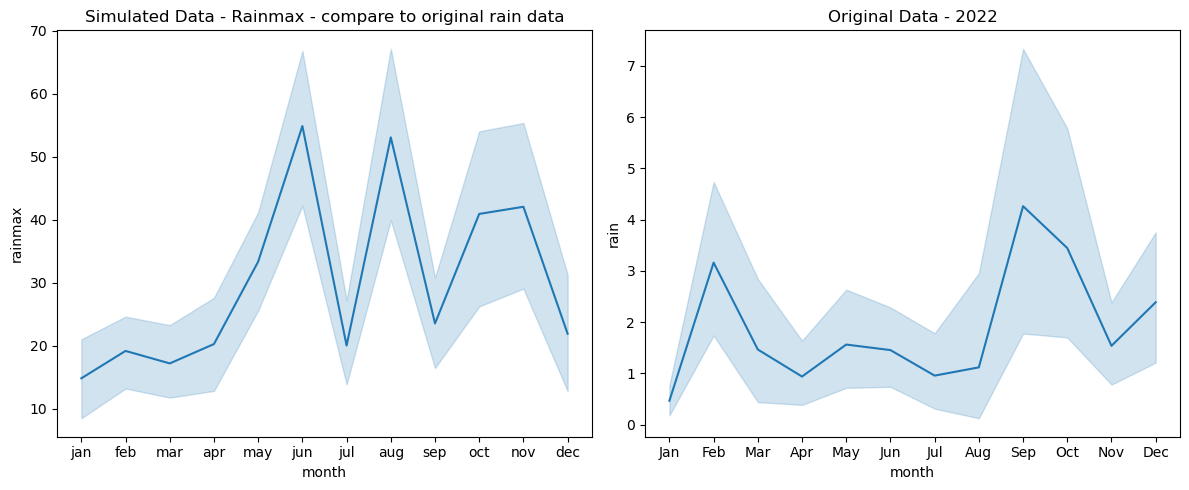

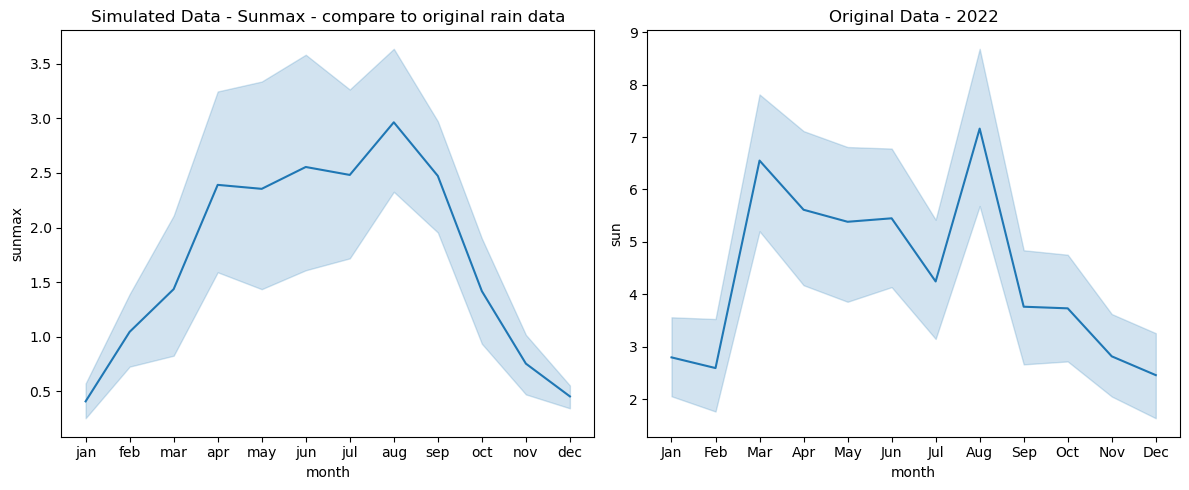

In [ ]:
# Next section of code using various code from websites
# https://stackoverflow.com/questions/65886795/plotting-daily-mean-spreaded-over-months-from-a-time-series
# https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
# https://sparkbyexamples.com/pandas/pandas-filter-dataframe-rows-on-dates/#:~:text=strftime()%20to%20Filter%20DataFrame%20Rows%20on%20Dates&text=You%20can%20use%20df%5Bdf,method%20to%20filter%20by%20month.
# https://stackoverflow.com/questions/48739924/pandas-add-a-new-column-whose-values-depend-on-a-specific-conditions
# This is used to compress the original daily data into monthly means
dfcomp= df[df['date'].str.endswith('2022')].copy() # onlysubset of data, extract for 2022
dfcomp['date'] = pd.to_datetime(dfcomp['date'], format='%d-%b-%Y') # convert string date column to an actual date datatype
dfcomp.describe
dfcomp['month'] = dfcomp['date'].dt.strftime('%b') # create new column with 3 char month

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_new, x="month", y="tempmax")
plt.title('Simulated Data - Tempmax - compare to original temp data') 
####SHOW ORIGINAL DATA to Compare#####
plt.subplot(1, 2, 2)
plt.title('Original Data - 2022') 
sns.lineplot(data=dfcomp, x="month", y="maxtp")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_new, x="month", y="tempmin")
plt.title('Simulated Data - Tempmin - compare to original temp data') 
####SHOW ORIGINAL DATA to Compare#####
plt.subplot(1, 2, 2)
plt.title('Original Data - 2022') 
sns.lineplot(data=dfcomp, x="month", y="mintp")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_new, x="month", y="rainmin")
plt.title('Simulated Data - Rainmin - compare to original rain data') 
####SHOW ORIGINAL DATA to Compare#####
plt.subplot(1, 2, 2)
plt.title('Original Data - 2022') 
sns.lineplot(data=dfcomp, x="month", y="rain")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_new, x="month", y="rainmax")
plt.title('Simulated Data - Rainmax - compare to original rain data') 
####SHOW ORIGINAL DATA to Compare#####
plt.subplot(1, 2, 2)
plt.title('Original Data - 2022') 
sns.lineplot(data=dfcomp, x="month", y="rain")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_new, x="month", y="sunmax")
plt.title('Simulated Data - Sunmax - compare to original rain data') 
####SHOW ORIGINAL DATA to Compare#####
plt.subplot(1, 2, 2)
plt.title('Original Data - 2022') 
sns.lineplot(data=dfcomp, x="month", y="sun")
plt.tight_layout()
plt.show()


#sns.relplot(data=df, kind="line", x="month", y="sun", hue="month")



***

## End